# <h1>Import Libraries<h1>

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from datetime import datetime,date,time, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# <h1>Define Functions<h1>

In [35]:
#Predictive function using sklearn
#df is the dataframe used for prediction,
#target column
#N will be the number of days before ith day(predicted day) used for prediction
#minimum value for prediction to make sure prediction does not go below zero
#offset for picking out predicted values only for validation set and test set

def pred_sklearn(df,target_col,N,pred_min,offset):
    lin_reg_sklearn = LinearRegression()
    pred_list=[]
    for i in range(offset,len(df[target_col])):#for each day from start of validation/test set to end of set
        X_train=np.array(range(len(df[target_col][i-N:i])))#Create timesteps based on number of days used for prediction
        X_train=X_train.reshape(-1,1)
        y_train=np.array(df[target_col][i-N:i])#Training data will be the prices of N days before ith day
        y_train=y_train.reshape(-1,1)
        lin_reg_sklearn.fit(X_train,y_train)
        pred=lin_reg_sklearn.predict(np.array(N).reshape(1,-1))#Predict price based on object N
        pred_list.append(pred[0][0])
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min#If predicted value lower than pred_min, assign it the value of pred_min
    return pred_list#return list containing the prices predicted for all the ith days within the validation/test set

#Mean absolute percentage error function    
def mape(y_test,y_pred):
    y_test, y_pred= np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test-y_pred)/y_test))*100


#Root Mean Square Error function
def rmse(y_test,y_pred):
    y_test, y_pred=np.array(y_test), np.array(y_pred)
    return np.sqrt(((y_pred-y_test)**2).mean())

# <h1>Loading of Dataset<h1>

In [50]:
df= pd.read_csv("Yahoo.csv")
print(df.shape)
print(df.head)

(1218, 8)
<bound method NDFrame.head of       Unnamed: 0         Date    Open    High     Low   Close  AdjClose  \
0              0  31 Dec 2019  1.0100  1.0100  1.0000  1.0000    1.0000   
1              1  30 Dec 2019  1.0100  1.0100  1.0000  1.0100    1.0100   
2              2  27 Dec 2019  1.0000  1.0100  1.0000  1.0100    1.0100   
3              3  26 Dec 2019  1.0100  1.0100  1.0000  1.0000    1.0000   
4              4  24 Dec 2019  1.0000  1.0100  1.0000  1.0100    1.0100   
5              5  23 Dec 2019  0.9800  1.0000  0.9800  1.0000    1.0000   
6              6  20 Dec 2019  0.9750  0.9800  0.9700  0.9750    0.9750   
7              7  19 Dec 2019  0.9750  0.9750  0.9650  0.9700    0.9700   
8              8  18 Dec 2019  0.9800  0.9800  0.9650  0.9750    0.9750   
9              9  17 Dec 2019  0.9850  1.0100  0.9800  0.9800    0.9800   
10            10  16 Dec 2019  0.9900  0.9900  0.9800  0.9800    0.9800   
11            11  13 Dec 2019  0.9850  0.9900  0.9750  0.990

# <h1> Splitting of dataset into training, validation and test sets<h1>

Text(0, 0.5, 'Price')

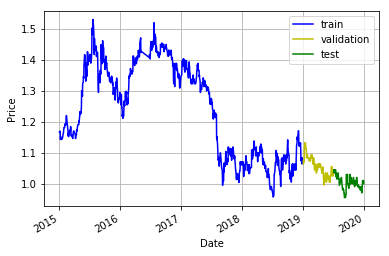

In [54]:
#Training set consists of data before 2019
#Validation set consists of data from first half of 2019
#Test set consists of data from second half of 2019

train_set = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'AdjClose'])
valid_set = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'AdjClose'])
test_set  = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'AdjClose'])


for i in range(0,len(df)):
    if "2019" in df['Date'][i]:
        valid_set['Date'][i] = df['Date'][i]
        valid_set['AdjClose'][i]= df['AdjClose'][i]
    else:
        train_set['Date'][i] = df['Date'][i]
        train_set['AdjClose'][i]= df['AdjClose'][i]

#Remove missing values from datasets
train_set.dropna(subset=["Date"],inplace=True)
valid_set.dropna(subset=["Date"],inplace=True)

#Splitting of 2019 data into validation and test sets
test_set=valid_set[:int(valid_set.shape[0]/2)]
valid_set=valid_set[int(valid_set.shape[0]/2):]

#Convert dates to datetime values and sort them based on ascending order
train_set['Date']=pd.to_datetime(train_set.Date)
valid_set['Date']=pd.to_datetime(valid_set.Date)
test_set['Date']=pd.to_datetime(test_set.Date)
train_set.index=train_set['Date']
valid_set.index=valid_set['Date']
test_set.index=test_set['Date']
train_data=train_set.sort_index(ascending=True,axis=0)
valid_data=valid_set.sort_index(ascending=True,axis=0)
test_data=test_set.sort_index(ascending=True,axis=0)
#print(train_data.shape[0])
#print(valid_data.shape[0])
#print(test_data.shape[0])
#print(train_data.head(10))
#print(valid_data.head(10))
#print(test_data.head(10))

#Make a dataframe consisting of training and validation set for use later
train_valid_df=pd.concat([train_data,valid_data],ignore_index=True)
train_valid_df['Date']=pd.to_datetime(train_valid_df.Date)


#Make a dataframe consisting of all sets with only the columns 'Date' and 'AdjClose' for later
total_data=pd.concat([train_data,valid_data,test_data],ignore_index=True)
total_data['Date']=pd.to_datetime(total_data.Date)

#print(train_valid_df.head(10))
#print(train_valid_df.tail(10))
#print(total_data.head(10))
#print(total_data.tail(10))      

ax = train_data.plot(x='Date', y='AdjClose', style='b-', grid=True)
ax = valid_data.plot(x='Date', y='AdjClose', style='y-', grid=True, ax=ax)
ax = test_data.plot(x='Date', y='AdjClose', style='g-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test'])
ax.set_xlabel("Date")
ax.set_ylabel("Price")

(1, 968)

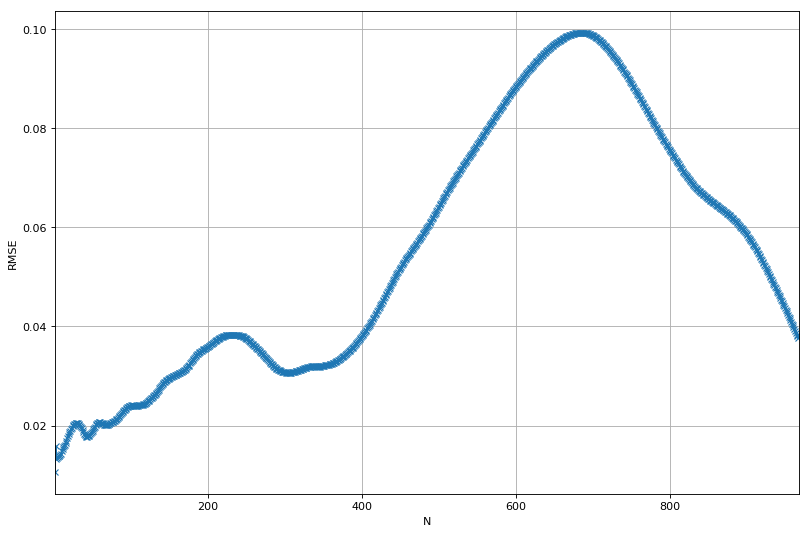

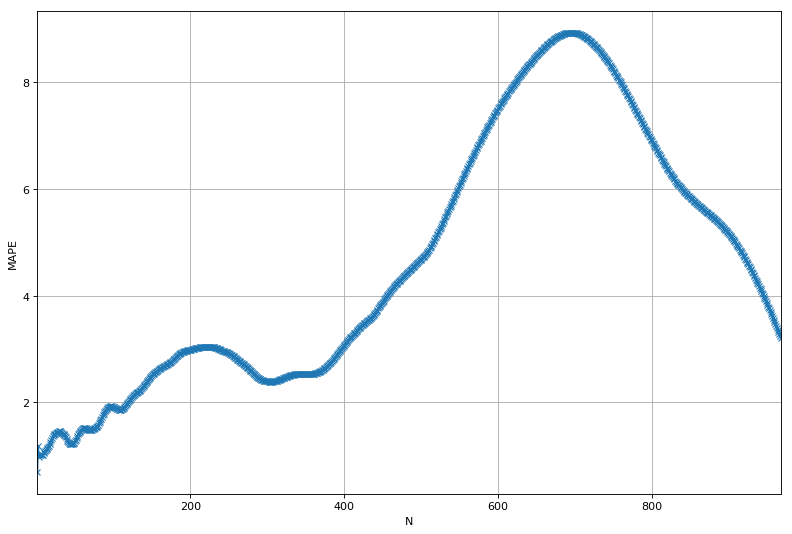

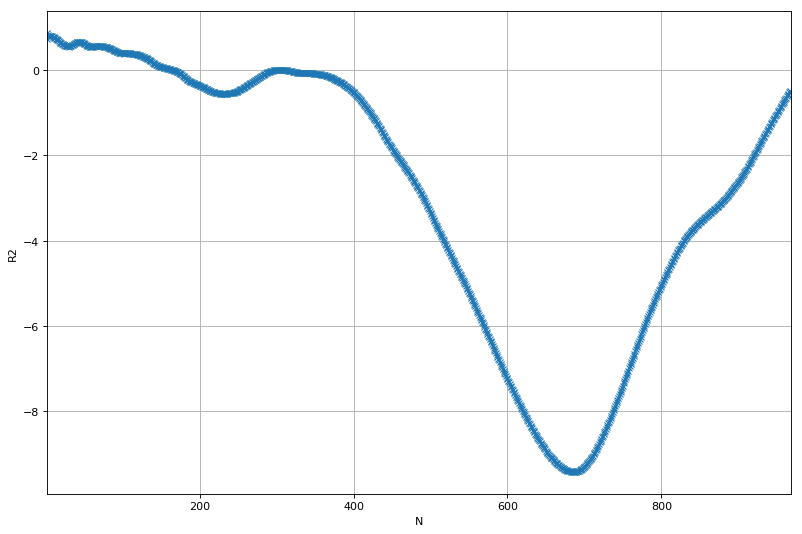

In [55]:
#Create empty lists for containing of RMSE,MAPE and R2 Score Values
RMSE=[]
MAPE=[]
R2_SCORE=[]

#Predict stock prices for validation set and calculate RMSE,MAPE and R2 Score Values for each N

for N in range(1,train_data.shape[0]):
    pred_valid=pred_sklearn(train_valid_df,'AdjClose',N,0,train_data.shape[0])
    valid_data.loc[:,'Pred_valid'+str(N)]=pred_valid
    RMSE.append(rmse(valid_data['AdjClose'],pred_valid))
    MAPE.append(mape(valid_data['AdjClose'],pred_valid))
    R2_SCORE.append(r2_score(valid_data['AdjClose'],pred_valid))


#Plot RMSE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, train_data.shape[0]), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([1, train_data.shape[0]])


#Plot MAPE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, train_data.shape[0]), MAPE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([1, train_data.shape[0]])

#Plot R2_SCORE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, train_data.shape[0]), R2_SCORE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('R2')
plt.xlim([1, train_data.shape[0]])

(0.01, 0.016)

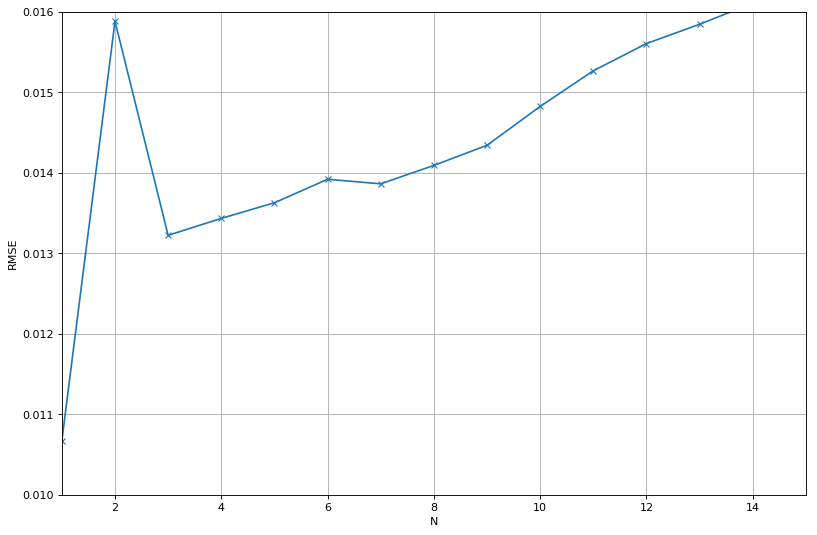

In [57]:
#Zoom in on graphs

#Plot RMSE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, train_data.shape[0]), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([1,15])
plt.ylim([0.01,0.016])

(0.6, 1.3)

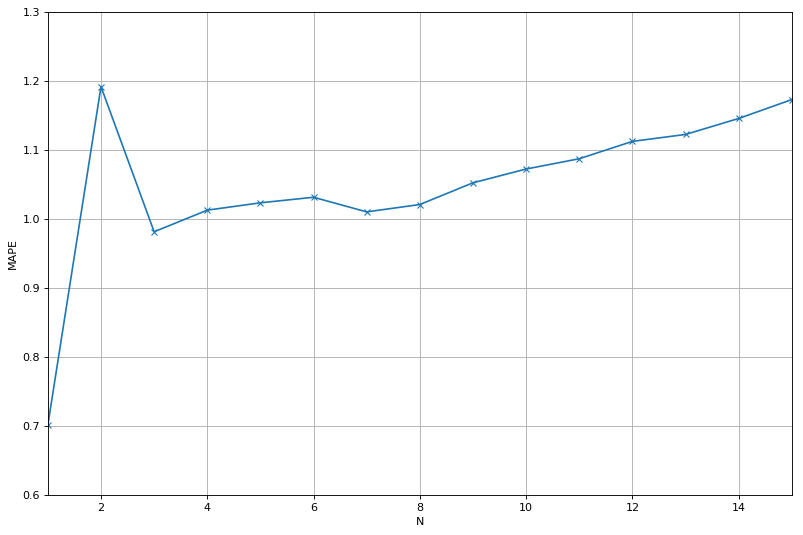

In [58]:
#Plot MAPE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, train_data.shape[0]), MAPE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([1, 15])
plt.ylim([0.6,1.3])

(0.7, 0.9)

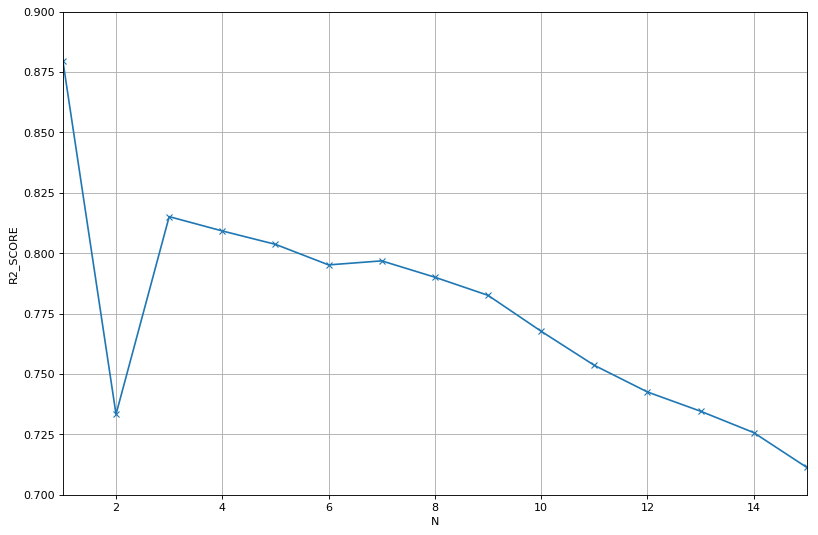

In [59]:
#Plot R2_SCORE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, train_data.shape[0]), R2_SCORE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('R2_SCORE')
plt.xlim([1,15])
plt.ylim([0.7,0.9])

In [60]:
#Based on the graphs, apart from N=1, N=3 has lowest RMSE,MAPE and R2 SCORE nearest to 1
print('RMSE for N=1 is',RMSE[0])
print('MAPE for N=1 is',MAPE[0])
print('R2 Score for N=1 is',R2_SCORE[0])
print('RMSE for N=3 is',RMSE[2])
print('MAPE for N=3 is',MAPE[2])
print('R2 Score for N=3 is',R2_SCORE[2])
Optimized_N=3

RMSE for N=1 is 0.010671457257563275
MAPE for N=1 is 0.7010385964194891
R2 Score for N=1 is 0.8795674866971745
RMSE for N=3 is 0.013221732950798181
MAPE for N=3 is 0.9810333620143086
R2 Score for N=3 is 0.815127185253768


In [61]:
pred_valid=pred_sklearn(train_valid_df, 'AdjClose', Optimized_N, 0, train_data.shape[0])
valid_data.loc[:,'Pred_valid'+str(Optimized_N)]=pred_valid
print("RMSE=",rmse(valid_data['AdjClose'],pred_valid))
print("MAPE=",mape(valid_data['AdjClose'],pred_valid),"%")
print("R2_SCORE=",r2_score(valid_data['AdjClose'],pred_valid))


ax1 = valid_data.plot(x= 'Date', y='AdjClose', style='rx-',grid=True, ax=ax);
ax1 = valid_data.plot(x='Date', y='Pred_valid3',style='gx-',grid=True, ax=ax);
ax1.legend(['validation', 'predictions with N=3'])
ax1.set_xlabel("Date")
ax1.set_ylabel("SGD")
ax1.set_xlim([date(2019,1,2),date(2019,7,3)])
ax1.set_ylim(0.98,1.14)


RMSE= 0.013221732950798181
MAPE= 0.9810333620143086 %
R2_SCORE= 0.815127185253768


(0.98, 1.14)

# <h1>Testing of Predictive Model<h1>

In [62]:
pred_test=pred_sklearn(total_data,'AdjClose',Optimized_N,0,train_data.shape[0]+valid_data.shape[0])
test_data.loc[:,'Pred_test'+'3']=pred_test
print("RMSE=",rmse(test_data['AdjClose'],pred_test))
print("MAPE=",mape(test_data['AdjClose'],pred_test),"%")
print("R2_SCORE=",r2_score(test_data['AdjClose'],pred_test))
print(test_data.tail(10))

ax2 = test_data.plot(x= 'Date', y='AdjClose', style='rx-',grid=True, ax=ax)
ax2 = test_data.plot(x='Date', y='Pred_test3',style='gx-',grid=True, ax=ax)
ax2.legend(['test', 'predictions with N=3'])
ax2.get_legend().legendHandles[0].set_color('red')
ax2.get_legend().legendHandles[1].set_color('green')
ax2.set_xlabel("Date")
ax2.set_ylabel("SGD")
ax2.set_xlim([date(2019,7,4),date(2019,12,31)])
ax2.set_ylim(0.95,1.1)

RMSE= 0.013305949212455497
MAPE= 1.0002845869016466 %
R2_SCORE= 0.5894213194759222
                 Date AdjClose  Pred_test3
Date                                      
2019-12-17 2019-12-17     0.98    0.983333
2019-12-18 2019-12-18    0.975    0.973333
2019-12-19 2019-12-19     0.97    0.973333
2019-12-20 2019-12-20    0.975    0.965000
2019-12-23 2019-12-23        1    0.973333
2019-12-24 2019-12-24     1.01    1.011667
2019-12-26 2019-12-26        1    1.030000
2019-12-27 2019-12-27     1.01    1.003333
2019-12-30 2019-12-30     1.01    1.006667
2019-12-31 2019-12-31        1    1.016667


(0.95, 1.1)

<h1>1-day prediction<h1> 

In [63]:
empty_df=pd.DataFrame(index=range(1),columns=['Date', 'AdjClose'])#Make an empty dataframe of size=1
total_data_1=pd.concat([total_data,empty_df],ignore_index=True)
print("1-day prediction=",pred_sklearn(total_data_1, 'AdjClose', Optimized_N, 0, total_data_1.shape[0]-1)[0])

1-day prediction= 0.9966666666666665


<h1>Multiple-day prediction<h1> 

In [64]:
total_data=pd.concat([train_data,valid_data,test_data],ignore_index=True)
total_data['Date']=pd.to_datetime(total_data.Date)

Days=10
empty_df=pd.DataFrame(index=range(1),columns=['Date', 'AdjClose'])
for x in range(Days):
    total_data=pd.concat([total_data,empty_df],ignore_index=True,sort=True)
    total_data.at[total_data.shape[0]-1,'AdjClose']=pred_sklearn(total_data, 'AdjClose', Optimized_N, 0, total_data.shape[0]-1)[0]
print(total_data['AdjClose'].iloc[-10:]) 

1218    0.996667
1219    0.988889
1220    0.984074
1221    0.977284
1222    0.971811
1223     0.96546
1224    0.959694
1225    0.953538
1226    0.947642
1227    0.941572
Name: AdjClose, dtype: object


C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# <h1>Analysis of Results<h1>
<ul>
 <li>For a good predictive model, RMSE and MAPE needs to be as low as possible and R2 Score needs to be near 1.
 <li>N=1 has a RMSE of 0.0107, MAPE of 0.701% and a R2 Score of 0.880 for prediction of prices in validation set.</li>
 <li>N=1 has the lowest RMSE, MAPE and a R2 Score closest to 1 for prediction of prices in validation set.</li>
 <li>However, for linear regression, using only the price from (i-1)th day for prediction of price on ith day would 
     result in high variance due to small size of training data.</li>
 <li>Therefore, next best N is adopted instead, which is N=3.</li>
 <li>N=3 has a RMSE of 0.0132, MAPE of 0.981% and a R2 Score of 0.815 for prediction of prices in validation set.</li>
 <li>N=3 has a RMSE of 0.0133, MAPE of 1.00% and a R2 Score of 0.589 for prediction of prices in test set.</li>
    <li>Using this predictive model, a stock pricing of 0.997 SGD is predicted for the next day.</li>
    <li>Multiple-day prediction is also possible, by using the predicted prices for prediction of prices on subsequent
        days.</li>
 </ul>
    